In [ ]:
if contact_number and isinstance(contact_number, str):
            digits_only = re.sub(r'\D', '', contact_number)

            if digits_only.startswith("91") and len(digits_only) > 10:
                digits_only = digits_only[2:]  # Remove the first two characters ('91')

            if len(digits_only) == 10 and digits_only[0] in "6789":  # Check for valid Indian mobile numbers
                score += 3

        if email:
            score += 3 if self.is_valid_email(email) else 0

        score += 3 if linkedin_urls else 0

        if github_url:
            github_suggestion = self.is_valid_url(github_url)
            score += 3 if not github_suggestion else 0
        else:
            score += 0

        if len(missing_sections)==0 and len(sections_not_capitalized)==0:
            score+=10
        elif len(missing_sections)==0 and len(sections_not_capitalized)>0:
            score+=8
        elif len(missing_sections)<=3:
            score+=6
        elif len(missing_sections)>4:
            score+=3

        if common_projects:
            score +=0
        else:
            score +=5

        if section_order_suggestion:
            score -= 2
        else:
            score
        
        """
        ds_skills_list_lower = [skill.lower() for skill in data_science_skills]
        skills_present_lower = [skill.lower() for skill in self.extract_skills_from_resume(skills) ]

        matching_skill_count = 0
        for skill in skills_present_lower:
            if ds_skills_list_lower:
                matching_skill_count+=1
        if  matching_skill_count==0:
            score+=0
        
        if matching_skill_count<=5:
            score+=2
        elif matching_skill_count>=10 and matching_skill_count<=15:
            score+5
        else:
            score+=8
       """
        
        if "PROJECTS" not in sections_text:
            score+=0
        else:
            project_list = sections_text.get("PROJECTS",[])
            project_count = len([x for x in project_list if "Description" in x])

            if project_count<=2:
                score+=2
            elif project_count>2 and project_count<=4:
                score+=5
            elif project_count>4:
                score+=3

                
        resume_data = {}        
        # Extract projects & links
        project_links = self.extract_project_links(sections_text)
        projects_with_links = len(project_links)

        # ✅ Count only projects with descriptions
        valid_projects = [
            p for p in sections_text.get("PROJECTS", []) if "description" in p.lower()
        ]
        total_projects = len(valid_projects)  # ✅ Count projects properly

        # ✅ Calculate project link score
        project_link_score = self.calculate_project_link_score(projects_with_links)
        resume_data["project_link_score"] = project_link_score

        # ✅ Prevent division by zero
        if total_projects > 0:
            if projects_with_links == 0:
                score += 0
            elif projects_with_links / total_projects >= 0.5:
                score += 1.5
            if projects_with_links == total_projects:
                score += 3
        else:
            score += 0  # ✅ Ensure no division error if no projects exist

            
        """"
        profile_summary = sections_text.get("PROFILE SUMMARY", "")
        print(profile_summary)

        summary_score = self.calculate_summary_score(profile_summary)
        score += summary_score 
        """
        ds_skills_score = self.calculate_ds_skills_score(skills)
        score += ds_skills_score

        certifications = sections_text.get("CERTIFICATIONS & ACADEMIC ENDEAVOURS", [])
        num_certifications = len(certifications)

        if num_certifications==0:
            score+=0
        elif 0 < num_certifications <= 2:
            score+=3
        elif 2 < num_certifications <= 4:
            score+=5
        elif num_certifications>4:
            score+=7
        """
        extra_urls_bonus = self.calculate_extra_urls_bonus(pdf_path)
        score += extra_urls_bonus
        """
        score += relevant_experience_score

        score += project_link_score 


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('Shark Tank India Raw.xlsx')

In [3]:
df

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Episode Title,Anchor,Industry,...,Invested Guest Name,All Guest Names,Namita Present,Vineeta Present,Anupam Present,Aman Present,Peyush Present,Amit Present,Ashneer Present,Guest Present
0,1,BluePineFoods,1,1,2021-12-20,2022-02-04,2021-12-20,Badlegi Business Ki Tasveer,Rannvijay Singh,Food,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
1,1,BoozScooters,1,2,2021-12-20,2022-02-04,2021-12-20,Badlegi Business Ki Tasveer,Rannvijay Singh,Vehicles/Electrical Vehicles,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
2,1,HeartUpMySleeves,1,3,2021-12-20,2022-02-04,2021-12-20,Badlegi Business Ki Tasveer,Rannvijay Singh,Beauty/Fashion,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
3,1,TagzFoods,2,4,2021-12-20,2022-02-04,2021-12-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Food,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
4,1,HeadAndHeart,2,5,2021-12-20,2022-02-04,2021-12-21,"Insaan, Ideas Aur Sapne",Rannvijay Singh,Education,...,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,3,$KrishnaRama,51,474,2024-01-22,2024-03-31,2024-03-30,Brilliant Businesses,Snehil Dixit Mehra,Entertainment,...,NaN,Azhar Iqubal,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
474,3,Rentit4me,51,475,2024-01-22,2024-03-31,2024-03-30,Brilliant Businesses,Snehil Dixit Mehra,Services,...,NaN,Azhar Iqubal,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
475,3,CoolTheGlobe,52,476,2024-01-22,2024-03-31,2024-03-31,Ecopreneur Special,Snehil Dixit Mehra,Others,...,Radhika Gupta,"Azhar Iqubal,Radhika Gupta",1.0,NaN,1.0,1.0,NaN,NaN,NaN,2.0
476,3,Canvaloop,52,477,2024-01-22,2024-03-31,2024-03-31,Ecopreneur Special,Snehil Dixit Mehra,Manufacturing,...,"Azhar Iqubal,Radhika Gupta","Azhar Iqubal,Radhika Gupta",1.0,NaN,1.0,1.0,NaN,NaN,NaN,2.0


In [4]:
df.columns

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Episode Title',
       'Anchor', 'Industry', 'Business Description', 'Company Website',
       'Started in', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'EBITDA', 'Cash Burn', 'SKUs', 'Has Patents', 'Bootstrapped',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Debt Interest',
       'Deal Valuation', 'Number of Sharks in Deal', 'Deal Has Conditions',
       'Royalty Deal', 'Advisory Shares Equity', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Vineeta

In [5]:
df.shape

(478, 78)

In [6]:
columns_to_drop = [
    'Episode Number', 'Original Air Date', 'Episode Title', 'Anchor', 
    'Business Description', 'Company Website', 'Number of Presenters', 
    'Transgender Presenters', 'Couple Presenters', 'Pitchers Average Age',
    'EBITDA', 'Cash Burn', 'SKUs', 'Has Patents', 'Bootstrapped', 
    'Debt Interest', 'Royalty Deal', 'Advisory Shares Equity', 
    'Namita Investment Amount', 'Namita Investment Equity', 'Namita Debt Amount',
    'Vineeta Investment Amount', 'Vineeta Investment Equity', 'Vineeta Debt Amount',
    'Anupam Investment Amount', 'Anupam Investment Equity', 'Anupam Debt Amount',
    'Aman Investment Amount', 'Aman Investment Equity', 'Aman Debt Amount',
    'Peyush Investment Amount', 'Peyush Investment Equity', 'Peyush Debt Amount',
    'Amit Investment Amount', 'Amit Investment Equity', 'Amit Debt Amount',
    'Ashneer Investment Amount', 'Ashneer Investment Equity', 'Ashneer Debt Amount',
    'Guest Investment Amount', 'Guest Investment Equity', 'Guest Debt Amount',
    'Invested Guest Name', 'All Guest Names', 'Namita Present', 'Vineeta Present',
    'Anupam Present', 'Aman Present', 'Peyush Present', 'Amit Present',
    'Ashneer Present', 'Guest Present']

df.drop(columns=columns_to_drop, inplace=True)

In [7]:
df['Started in'].fillna(0, inplace=True)
financial_cols = ['Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin', 
                  'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt', 'Deal Valuation']
df[financial_cols] = df[financial_cols].fillna(0)

df['Deal Has Conditions'].fillna('No', inplace=True)

C:\Users\NAJID KHAN\AppData\Local\Temp\ipykernel_8196\1681617116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Started in'].fillna(0, inplace=True)
C:\Users\NAJID KHAN\AppData\Local\Temp\ipykernel_8196\1681617116.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [8]:
df

,Season Number,Startup Name,Pitch Number,Season Start,Season End,Industry,Started in,Male Presenters,Female Presenters,Pitchers City,...,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Deal Valuation,Number of Sharks in Deal,Deal Has Conditions
0,1,BluePineFoods,1,2021-12-20,2022-02-04,Food,2016.0,2.0,1.0,Delhi,...,5.00,1000.000000,1,1.0,75.0,16.00,0.0,469.0,3.0,No
1,1,BoozScooters,2,2021-12-20,2022-02-04,Vehicles/Electrical Vehicles,2017.0,1.0,NaN,Ahmedabad,...,15.00,267.000000,1,1.0,40.0,50.00,0.0,80.0,2.0,No
2,1,HeartUpMySleeves,3,2021-12-20,2022-02-04,Beauty/Fashion,2021.0,NaN,1.0,Delhi,...,10.00,250.000000,1,1.0,25.0,30.00,0.0,83.0,2.0,No
3,1,TagzFoods,4,2021-12-20,2022-02-04,Food,2019.0,2.0,NaN,Bangalore,...,1.00,7000.000000,1,1.0,70.0,2.75,0.0,2545.0,1.0,No
4,1,HeadAndHeart,5,2021-12-20,2022-02-04,Education,2015.0,1.0,3.0,Patiala,...,5.00,1000.000000,0,NaN,0.0,0.00,0.0,0.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,3,$KrishnaRama,474,2024-01-22,2024-03-31,Entertainment,2023.0,2.0,NaN,Hyderabad,...,30.00,666.666667,0,NaN,0.0,0.00,0.0,0.0,NaN,No
474,3,Rentit4me,475,2024-01-22,2024-03-31,Services,2023.0,1.0,2.0,Gurugram,...,5.00,3000.000000,0,NaN,0.0,0.00,0.0,0.0,NaN,No
475,3,CoolTheGlobe,476,2024-01-22,2024-03-31,Others,0.0,NaN,1.0,Pune,...,5.00,500.000000,1,1.0,25.0,8.00,0.0,312.5,2.0,No
476,3,Canvaloop,477,2024-01-22,2024-03-31,Manufacturing,2020.0,1.0,1.0,Surat,...,1.33,7518.796992,1,1.0,200.0,4.00,0.0,5000.0,5.0,No


In [9]:
df['Started in'] = df['Started in'].astype(int)
df[financial_cols] = df[financial_cols].astype(float)

In [10]:
df['Pitch Outcome'] = df['Accepted Offer'].apply(lambda x: 'Success' if x == 1 else 'Failure')

In [11]:
df.columns

Index(['Season Number', 'Startup Name', 'Pitch Number', 'Season Start',
       'Season End', 'Industry', 'Started in', 'Male Presenters',
       'Female Presenters', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Deal Valuation',
       'Number of Sharks in Deal', 'Deal Has Conditions', 'Pitch Outcome'],
      dtype='object')

In [89]:
df.to_csv('Transformed Shark Tank India')

In [65]:
df1 = pd.read_excel('Shark Tank India Transformed.xlsx')

In [67]:
df1.columns

Index(['Season Number', 'Startup Name', 'Pitch Number', 'Industry',
       'Started in', 'Season Start', 'Season End', 'Male Presenters',
       'Female Presenters', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Received Offer', 'Accepted Offer', 'Total Deal Amount',
       'Total Deal Equity', 'Total Deal Debt', 'Deal Valuation',
       'Number of Sharks in Deal', 'Deal Has Conditions', 'Pitch Outcome'],
      dtype='object')

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\NAJID KHAN\AppData\Local\Temp\ipykernel_8196\2719027840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="coolwarm")


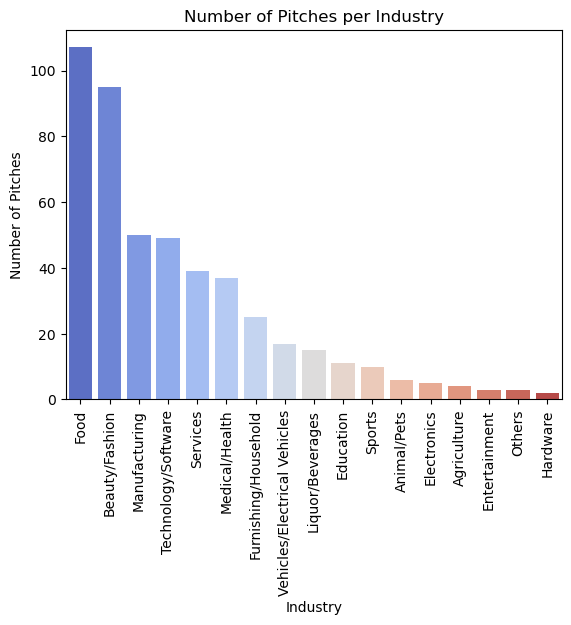

In [29]:
industry_counts = df['Industry'].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Industry")
plt.ylabel("Number of Pitches")
plt.title("Number of Pitches per Industry")
plt.show()

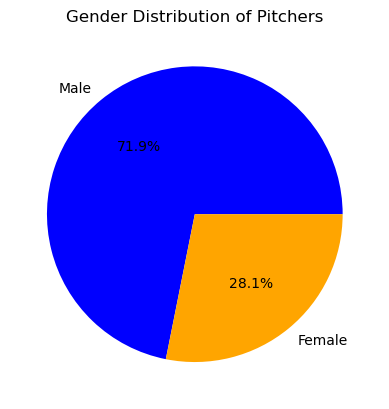

In [37]:
gender_counts = df[['Male Presenters', 'Female Presenters']].sum()
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title("Gender Distribution of Pitchers")
plt.show()

C:\Users\NAJID KHAN\AppData\Local\Temp\ipykernel_8196\3823069717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


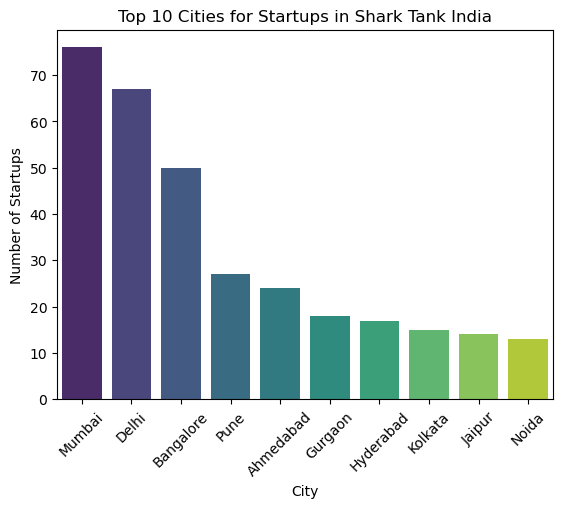

In [41]:
city_counts = df['Pitchers City'].value_counts().head(10)  # Top 10 cities
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Startups")
plt.title("Top 10 Cities for Startups in Shark Tank India")
plt.show()

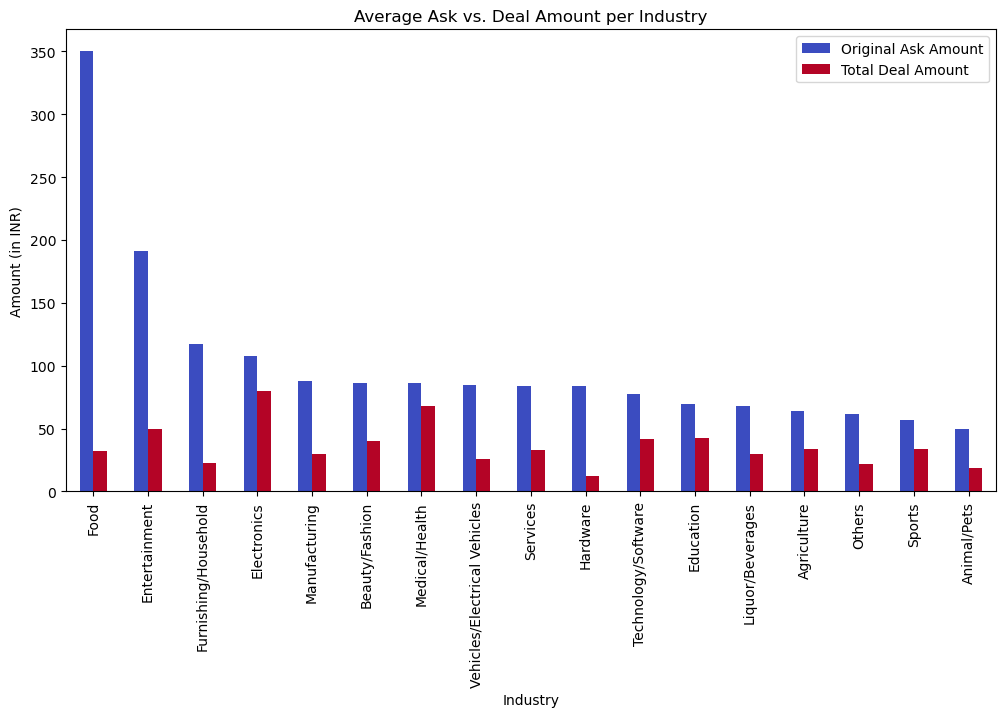

In [45]:
industry_financials = df.groupby('Industry')[['Original Ask Amount', 'Total Deal Amount']].mean().sort_values(by='Original Ask Amount', ascending=False)

industry_financials.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel("Industry")
plt.ylabel("Amount (in INR)")
plt.title("Average Ask vs. Deal Amount per Industry")
plt.xticks(rotation=90)
plt.legend(["Original Ask Amount", "Total Deal Amount"])
plt.show()


C:\Users\NAJID KHAN\AppData\Local\Temp\ipykernel_8196\2539897992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Deal Valuation'], palette="Set2")


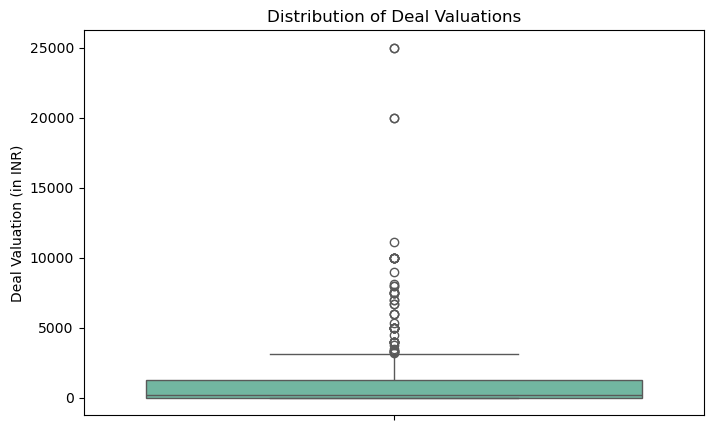

In [47]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Deal Valuation'], palette="Set2")
plt.title("Distribution of Deal Valuations")
plt.ylabel("Deal Valuation (in INR)")
plt.show()

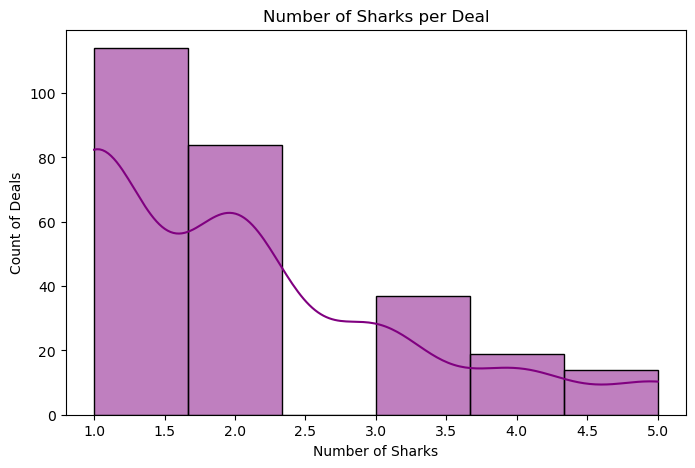

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Number of Sharks in Deal'], bins=6, kde=True, color='purple')
plt.xlabel("Number of Sharks")
plt.ylabel("Count of Deals")
plt.title("Number of Sharks per Deal")
plt.show()

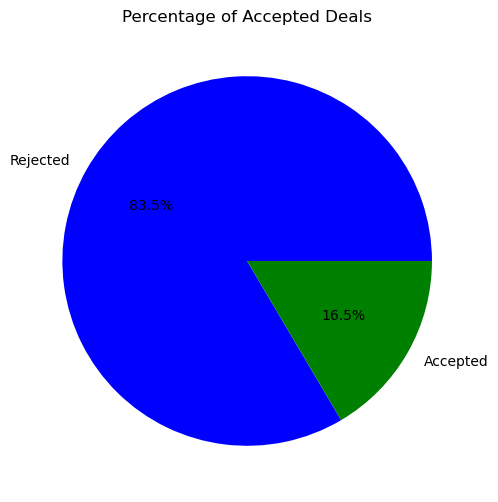

In [53]:
accepted_count = df['Accepted Offer'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(accepted_count, labels=["Rejected", "Accepted"], autopct='%1.1f%%', colors=['blue', 'green'])
plt.title("Percentage of Accepted Deals")
plt.show()

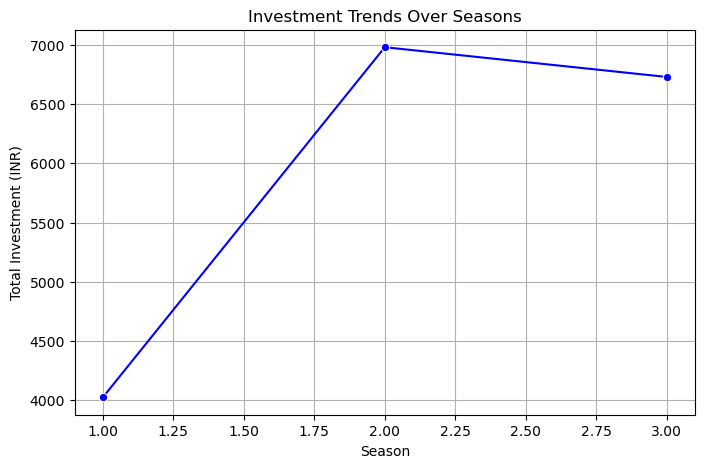

In [55]:
season_trend = df.groupby('Season Number')['Total Deal Amount'].sum()

plt.figure(figsize=(8, 5))
sns.lineplot(x=season_trend.index, y=season_trend.values, marker="o", color='blue')
plt.xlabel("Season")
plt.ylabel("Total Investment (INR)")
plt.title("Investment Trends Over Seasons")
plt.grid()
plt.show()

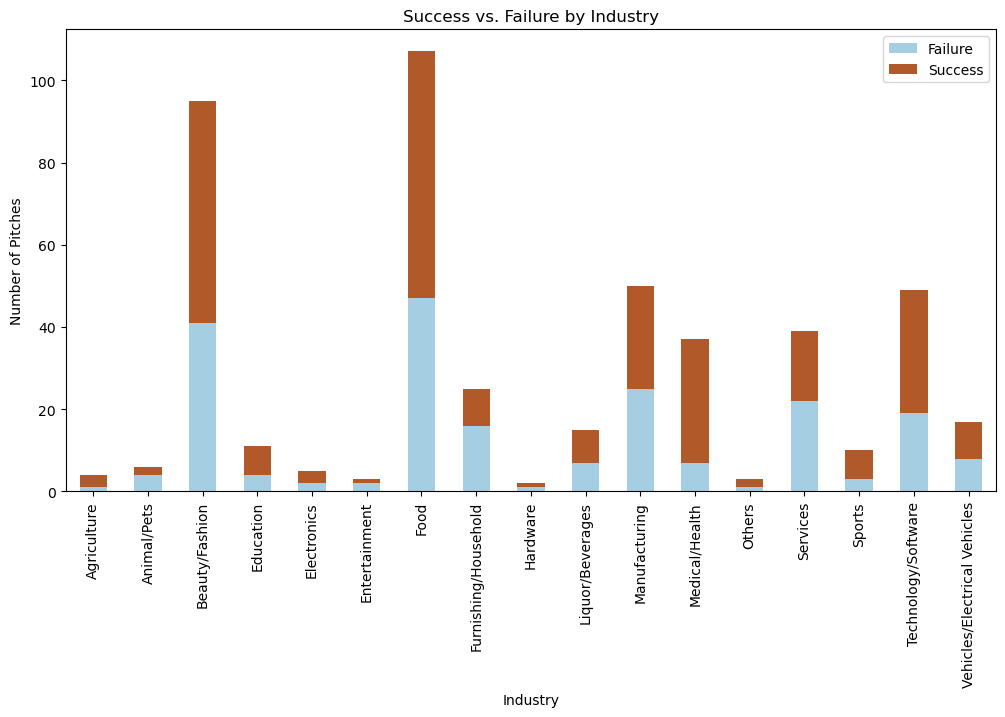

In [57]:
industry_success = df.groupby(['Industry', 'Pitch Outcome']).size().unstack()

industry_success.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Paired")
plt.xlabel("Industry")
plt.ylabel("Number of Pitches")
plt.title("Success vs. Failure by Industry")
plt.xticks(rotation=90)
plt.legend(["Failure", "Success"])
plt.show()


C:\Users\NAJID KHAN\AppData\Local\Temp\ipykernel_8196\2491041960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_investment.index, y=season_investment.values, palette="Blues_d")


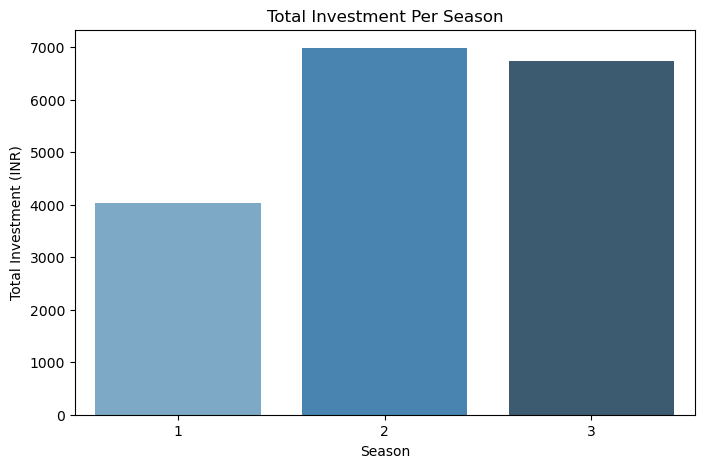

In [59]:
plt.figure(figsize=(8, 5))
season_investment = df.groupby('Season Number')['Total Deal Amount'].sum()

sns.barplot(x=season_investment.index, y=season_investment.values, palette="Blues_d")
plt.xlabel("Season")
plt.ylabel("Total Investment (INR)")
plt.title("Total Investment Per Season")
plt.show()


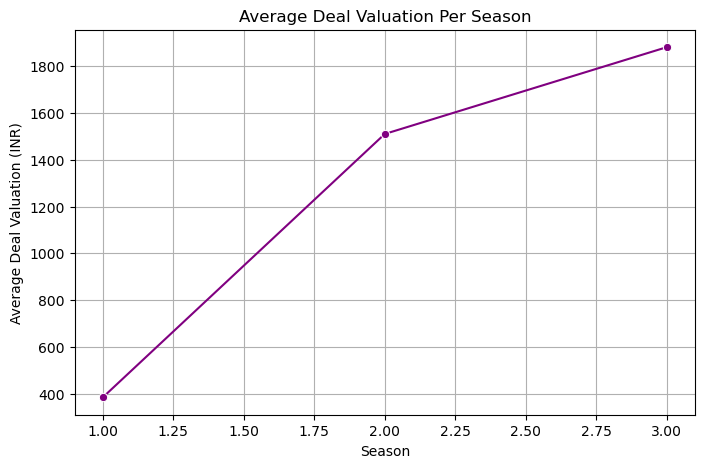

In [61]:
plt.figure(figsize=(8, 5))
avg_valuation = df.groupby('Season Number')['Deal Valuation'].mean()

sns.lineplot(x=avg_valuation.index, y=avg_valuation.values, marker="o", color='purple')
plt.xlabel("Season")
plt.ylabel("Average Deal Valuation (INR)")
plt.title("Average Deal Valuation Per Season")
plt.grid()
plt.show()

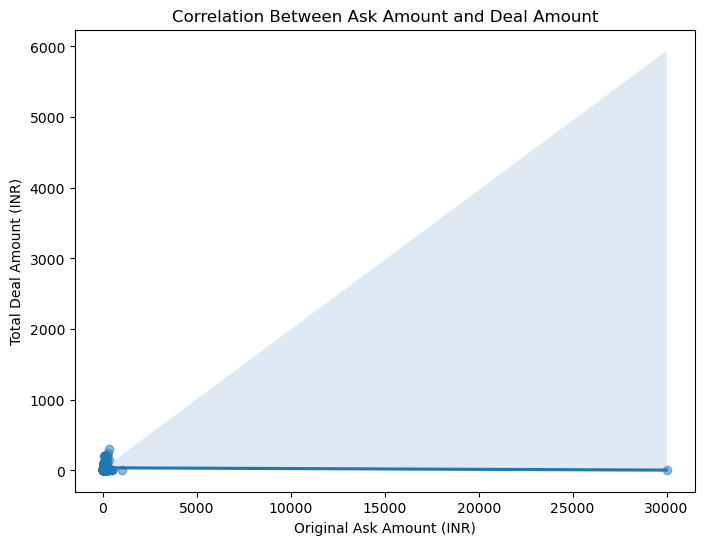

In [77]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Original Ask Amount'], y=df['Total Deal Amount'], scatter_kws={'alpha':0.5})
plt.xlabel("Original Ask Amount (INR)")
plt.ylabel("Total Deal Amount (INR)")
plt.title("Correlation Between Ask Amount and Deal Amount")
plt.show()

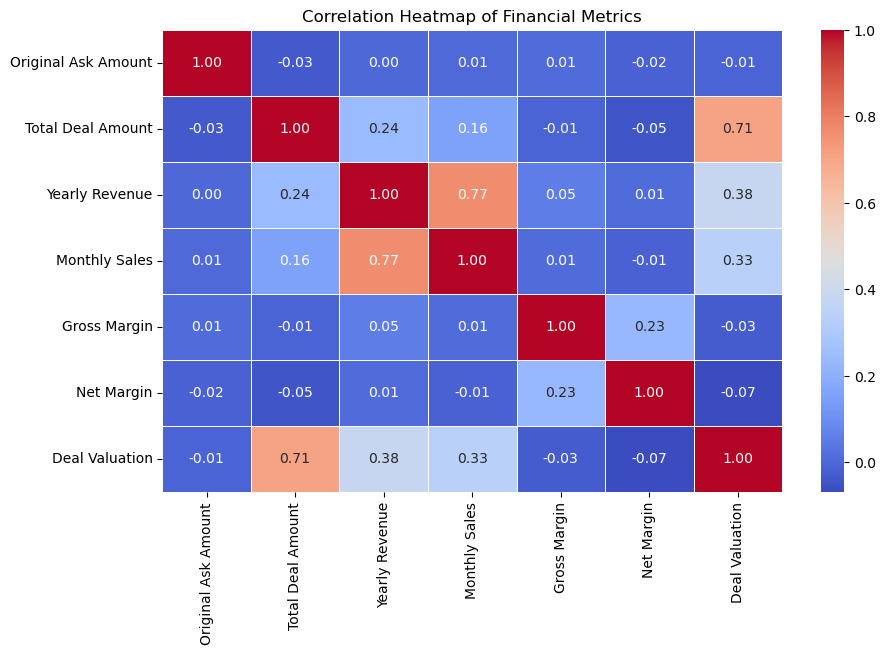

In [79]:
plt.figure(figsize=(10, 6))
financial_data = df[['Original Ask Amount', 'Total Deal Amount', 'Yearly Revenue', 
                         'Monthly Sales', 'Gross Margin', 'Net Margin', 'Deal Valuation']]

sns.heatmap(financial_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Financial Metrics")
plt.show()


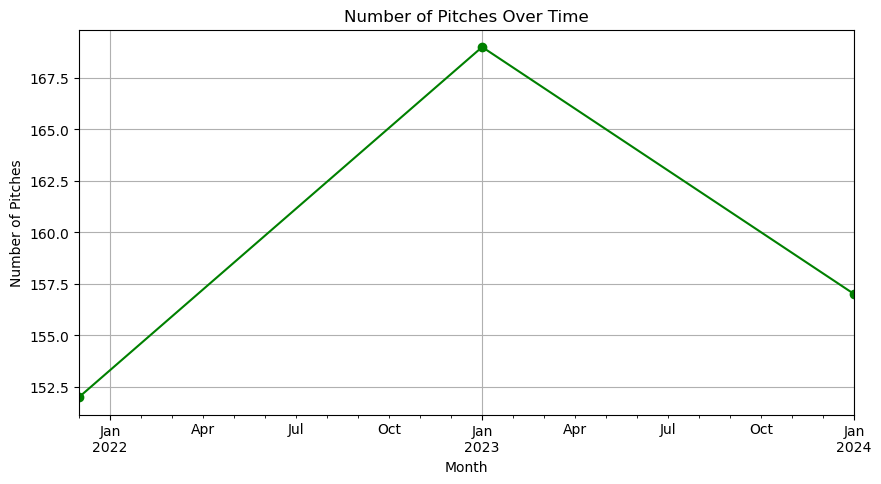

In [83]:
df['Season Start'] = pd.to_datetime(df['Season Start'])

pitches_per_month = df.groupby(df['Season Start'].dt.to_period("M")).size()

plt.figure(figsize=(10, 5))
pitches_per_month.plot(kind='line', marker="o", color='green')
plt.xlabel("Month")
plt.ylabel("Number of Pitches")
plt.title("Number of Pitches Over Time")
plt.grid()
plt.show()


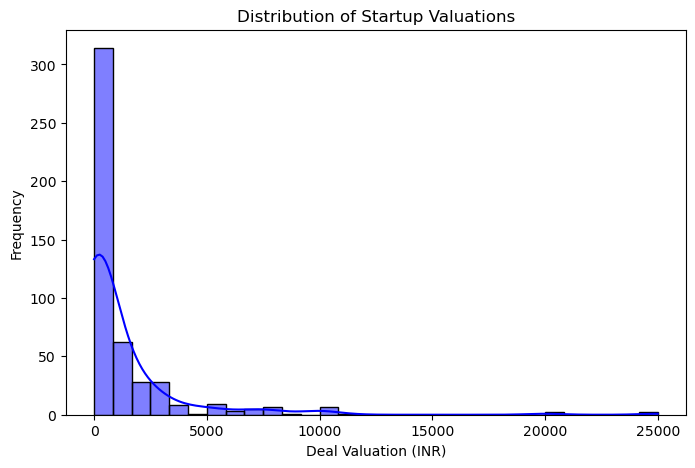

In [85]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Deal Valuation'], kde=True, bins=30, color="blue")
plt.xlabel("Deal Valuation (INR)")
plt.ylabel("Frequency")
plt.title("Distribution of Startup Valuations")
plt.show()


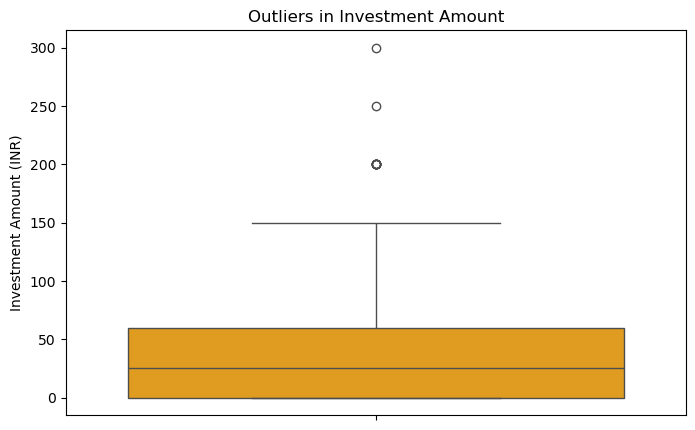

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Total Deal Amount'], color="orange")
plt.title("Outliers in Investment Amount")
plt.ylabel("Investment Amount (INR)")
plt.show()
